In [5]:
#BASE PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dt
%matplotlib inline

#PREPROCESSING PACKAGES

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

#MODELLING PACKAGES

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#VALIDATION PACKAGES
from sklearn.model_selection import cross_val_score

#EVALUATION METRIC PACKAGES
from sklearn.metrics import mean_squared_error

In [ ]:
train = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Analytics vidya\Time_series\Train_SU63ISt.csv')
test = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Analytics vidya\Time_series\Test_0qrQsBZ.csv')

In [ ]:
train.head()

In [ ]:
train.tail()

In [10]:
df = pd.read_csv(r'F:\Hackathons_Codes_and_Data\Analytics vidya\Time_series\Train_SU63ISt.csv',parse_dates = True,  nrows = 11856)
train = df[0: 10392]
test = df[10392:]

In [14]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H.%M') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H.%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H.%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

C:\Users\nilu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\nilu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\Users\nilu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


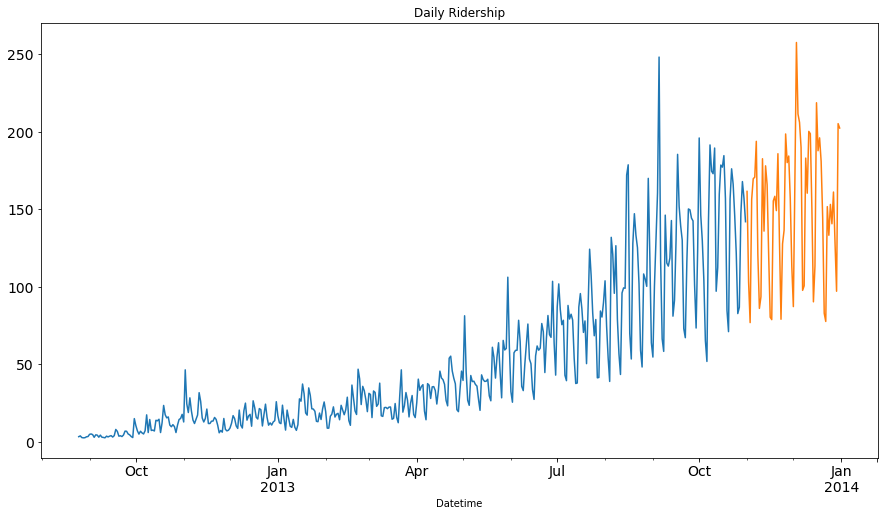

In [15]:
train.Count.plot(figsize = (15, 8), title = 'Daily Ridership', fontsize = 14)
test.Count.plot(figsize = (15, 8), title = 'Daily Ridership', fontsize = 14)
plt.show()

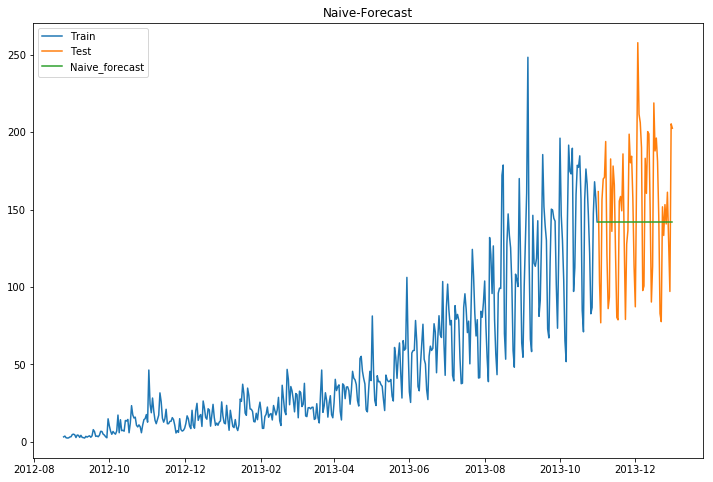

In [20]:
dd = np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd) - 1]
plt.figure(figsize = (12, 8))
plt.plot(train.index, train.Count, label = 'Train')
plt.plot(test.index, test.Count, label ='Test')
plt.plot(y_hat.index, y_hat['naive'], label ='Naive_forecast')
plt.legend(loc = 'best')
plt.title("Naive-Forecast")
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rmse)

43.91640614391676


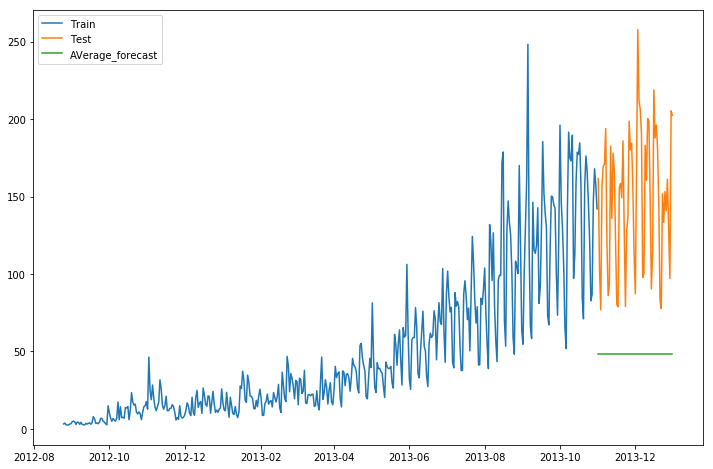

In [27]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize = (12, 8))
plt.plot(train['Count'], label = 'Train')
plt.plot(test['Count'], label = 'Test')
plt.plot(y_hat_avg['avg_forecast'], label ='AVerage_forecast')
plt.legend(loc ='best')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test.Count, y_hat_avg['avg_forecast']))
print(rmse)

109.88526527082863


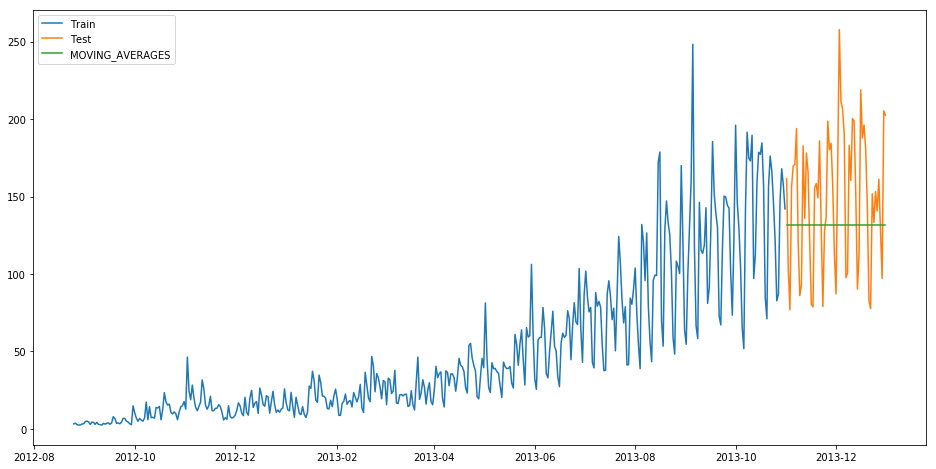

In [37]:
y_hat_avg = test.copy()
y_hat_avg['mov_avg'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize = (16, 8))
plt.plot(train['Count'], label = 'Train')
plt.plot(test['Count'], label = 'Test')
plt.plot(y_hat_avg['mov_avg'], label = 'MOVING_AVERAGES')
plt.legend(loc='best')
plt.show()

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level =0.6, optimized = False)
y_hat_avg['SES'] = sit2.forecast(len(test))
plt.figure(figsize = (16, 8))
plt.plot(train['Count'], label = 'Train')
plt.plot(test['Count'], label = 'Test')
plt.plot(y_hat_avg['SES'],label =  'Smoothing')
plt.legend(loc = 'best')
plt.show()

ImportError: cannot import name 'SimpleExpSmoothing'